In [ ]:
import pandas as pd

In [ ]:
#Ler CSV e renomear colunas
df_data = pd.read_csv('https://raw.githubusercontent.com/infocbra/pratica-integrada-cd-e-am-2021-1-g1-ghjp/a496346889e5ce4d058ef7675ff853e4d344fe6d/1_sprint/ovinis_data.csv?token=AO5C2EBETFG6VUNLXT2SAT3BD5JGU')
df_data.columns = ['indexes','date/time', 'city', 'state', 'shape', 'duration', 'summary', 'posted']
df_data.drop(labels='indexes', axis=1, inplace=True)

In [ ]:
#Agrupar os resultados
shapes = df_data[['shape']].groupby(['shape']).size().sort_values(ascending=False)[:4].reset_index(level=0)
states = df_data[['state']].groupby(['state']).size().sort_values(ascending=False)[:4].reset_index(level=0)

In [ ]:
#Filtrar apenas os valores dos estados e formatos a serem utilizados
data = df_data.loc[df_data['shape'].isin(shapes['shape']) & df_data['state'].isin(states['state'])]
data = data[['shape', 'state']]
data = data.value_counts().reset_index()

data.columns = ['shape', 'state', 'total']

,shape,state,total
0,Light,CA,2452
1,Circle,CA,1180
2,Light,WA,1140
3,Light,FL,1078
4,Fireball,CA,994
5,Triangle,CA,982
6,Light,TX,863
7,Circle,FL,647
8,Fireball,FL,629
9,Triangle,FL,470


In [ ]:
#Estruturar o dataframe para facilitar o plot
data = data.set_index('state')
data = data.pivot(columns='shape')
data.columns = data.columns.droplevel()

data = data[['Light', 'Circle', 'Fireball', 'Triangle']]

shape,Light,Circle,Fireball,Triangle
state,,,,
CA,2452,1180,994,982
FL,1078,647,629,470
TX,863,389,262,430
WA,1140,468,462,404


Gráfico de barras agrupadas

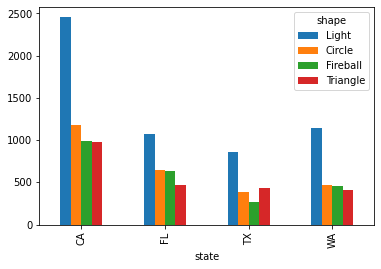

In [ ]:
data.plot(kind='bar')

Gráfico de barras empilhadas

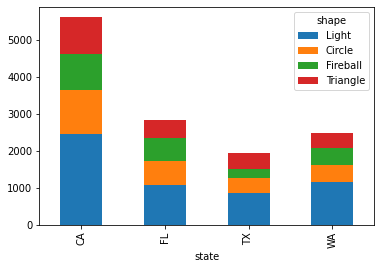

In [ ]:
data.plot(stacked=True, kind='bar')